1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy
from scipy import stats
import pandas as pd
import seaborn as sns

(0.0, 26.0)

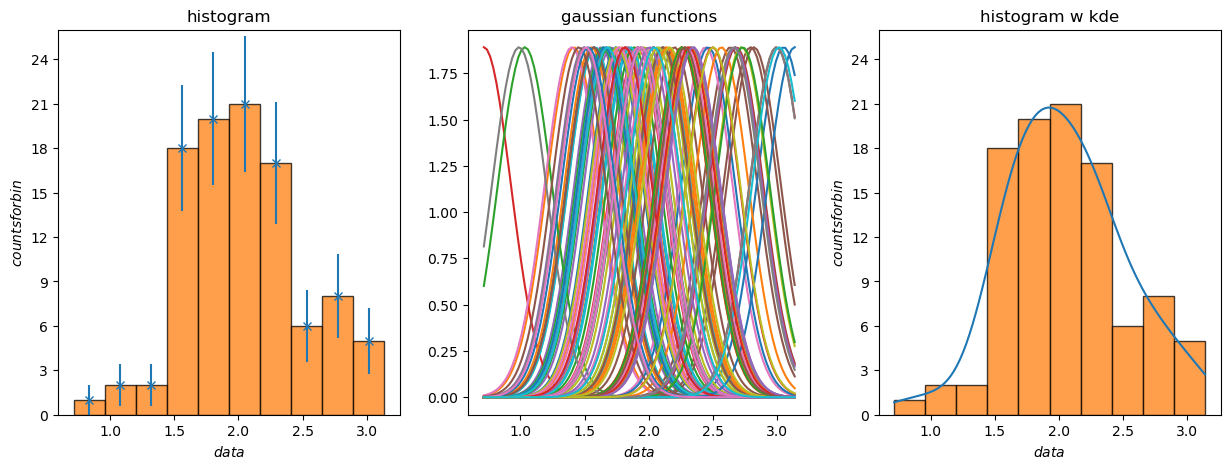

In [3]:
# fill a np array x of len N with a variable normally distributed with given mean and std
mu  = 2
std = 5e-1
N   = 100
x = np.random.normal(mu, std, N)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# fill an hist in pyplot
ax1.set_xlabel("$data$")
ax1.set_ylabel("$counts for bin$")
ax1.set_title("histogram")
ax1.yaxis.set_major_locator(MaxNLocator(integer = True))
counts, bins, _ = ax1.hist(x, alpha=0.75, color='tab:orange', edgecolor='black')

x_points = [(x1+x2)*0.5 for x1, x2 in zip(bins[:-1], bins[1:])]
err      = [np.sqrt(n) for n in counts]

ax1.errorbar(x_points, counts, err, fmt='x', c='tab:blue')
ax1.set_ylim([0,counts.max()+int(np.sqrt(counts.max()))+1])

# for every element of x (x_) create a gauss(x_, 1.06*x.std()*x.size**-1/5)
x_axis = np.linspace(x.min(), x.max(), 100)
gaussians = []
for x_ in x:
    gaussians.append(stats.norm.pdf(x_axis, x_, 1.06*std*N**(-1/5)))
    ax2.plot(x_axis, gaussians[-1])
ax2.set_title("gaussian functions")
ax2.set_xlabel("$data$")

# sum all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram
gauss_sum  = np.sum(gaussians, axis=0)
gauss_area = scipy.integrate.trapz(gauss_sum, dx=abs(x.max()-x.min())/N)
hist_area  = np.sum(np.diff(bins)*counts)
ax3.set_xlabel("$data$")
ax3.set_ylabel("$counts for bin$")
ax3.set_title("histogram w kde")
ax3.yaxis.set_major_locator(MaxNLocator(integer = True))
ax3.plot(x_axis, (gauss_sum/gauss_area)*hist_area)
ax3.hist(x, alpha=0.75, edgecolor='black')
ax3.set_ylim([0,counts.max()+int(np.sqrt(counts.max()))+1])

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2020-11-17 14:38:20--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2020-11-17 14:38:20--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83UcrULRU6e9PqpgyW2Ud6gq_BVV1oIDp8Jfng/file# [segue]
--2020-11-17 14:38:21--  https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83Ucr

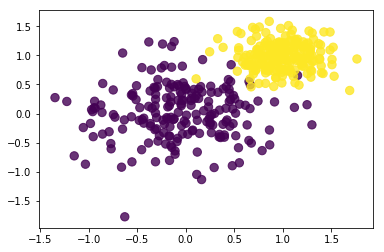

In [18]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

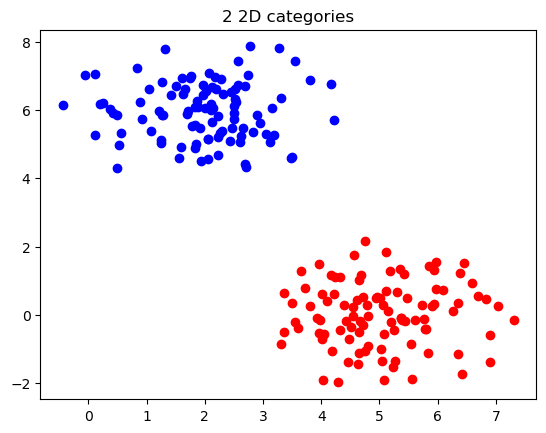

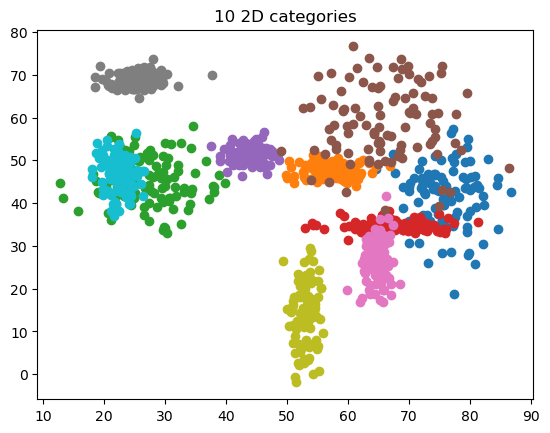

In [4]:
# first distribution-dataset
from numpy import random

y=random.normal(loc=0.0, scale=1.0, size=100)
y1=random.normal(loc=5, scale=1.0, size=100)
df1 = pd.DataFrame(y)
df3 = pd.DataFrame(y1)

#merge two df
result = pd.concat([df3,df1], axis=1, join='inner')

# adding column name to the respective columns
result.columns =['y1', 'y']

#second dataset
y2=random.normal(loc=2, scale=1.0, size=100)
y3=random.normal(loc=6, scale=1.0, size=100)
df2 = pd.DataFrame(y2)
df4 = pd.DataFrame(y3)

#merge two df
result1 = pd.concat([df2,df4], axis=1, join='inner')

# adding column name to the respective columns
result1.columns =['y2', 'y3']

#scatter plot
plt.scatter(result["y1"], result["y"], color='r', label='sin')
plt.scatter(result1["y2"], result1["y3"], color='b', label='sin')
plt.title("2 2D categories")
# To load the display window
plt.show()


def f(N):


    for i in range(N):
        y=random.normal(loc=random.uniform(10.5, 75.5), scale=random.uniform(1, 7.5), size=100)
        y1=random.normal(loc=random.uniform(10.5, 75.5), scale=random.uniform(1, 7.5), size=100)
        df1 = pd.DataFrame(y)
        df3 = pd.DataFrame(y1)

        #merge two df
        result = pd.concat([df3,df1], axis=1, join='inner')
        result.columns =['y1', 'y']
        #scatter plot
        plt.scatter(result["y1"], result["y"], label='sin')
        
    plt.title(str(N) +' 2D categories')
    plt.show()

 

        
        
#genera una m intera e una std in un intervallo
f(10)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[10489 rows x 2 columns]


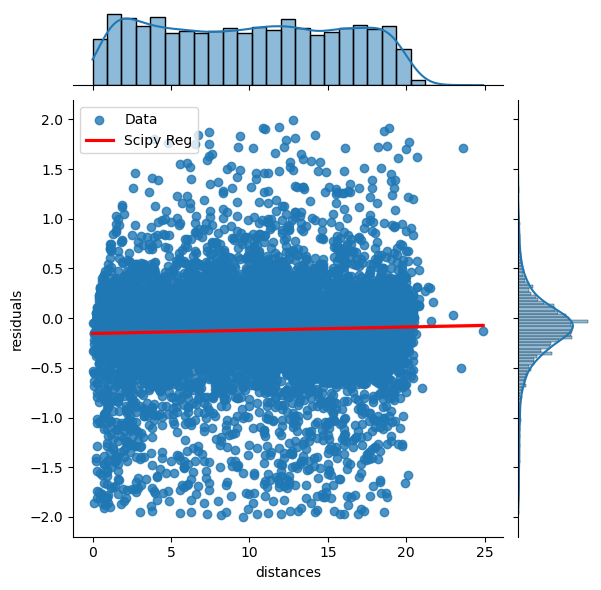

In [5]:
# read the dataset
file_name = 'residuals_261.npy'
df = pd.DataFrame(np.load(file_name, allow_pickle = True).item())

df=df[ abs(df['residuals']) < 2 ]
print(df)

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df['distances'],df['residuals'])

sns.jointplot(data=df, x="distances", y="residuals", kind="reg",joint_kws={'line_kws':{'color':'red'}})
plt.legend(labels=["Data","Scipy Reg"])

<ErrorbarContainer object of 3 artists>

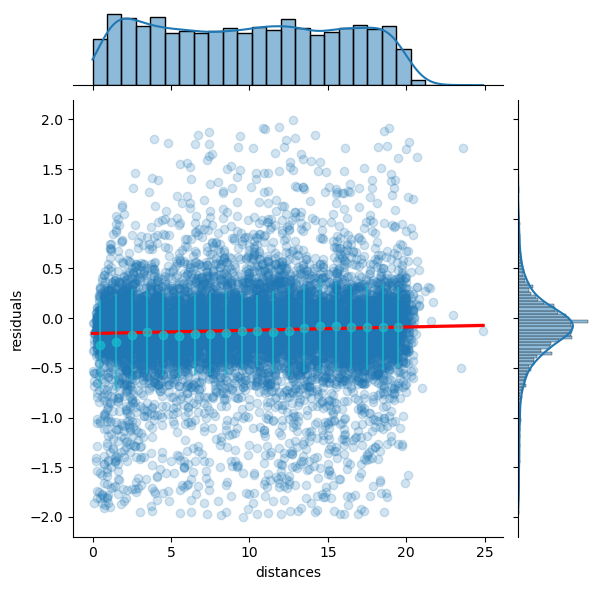

In [6]:
# x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
step_size = 0.5
x= [i+step_size for i in range(20)]

# y, the mean values of the "residuals", estimated in slices (bins) of "distance"
y = [ np.mean(df[df['distances'].between(step_size*i-step_size, step_size*i+step_size)]['residuals']) for i in range(20)]

# erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
erry = [ np.std(df[df['distances'].between(step_size*i-step_size, step_size*i+step_size)]['residuals']) for i in range(20)]

# Plot the profile plot on top of the scatter plot
sns.jointplot(x='distances', y='residuals', data=df, kind="reg", joint_kws={'line_kws':{'color':'red'},
              'scatter_kws': dict(alpha = 0.2)})
plt.errorbar(x, y, erry, c ='tab:cyan', fmt = 'o', alpha = 0.7)